# WeatherPy
----
This is a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. Retrieve the data from the [OpenWeatherMap API](https://openweathermap.org/api) to create a representative model of weather across world cities.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weatherpy_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500) 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

649

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_names = []
countries = []
lat_ls = []
lng_ls = []
temp_ls = []
humidity_ls = []
cloudiness_ls = []
wind_speeds = []
dates = []


In [4]:
# Loop through cities from random select

print("Beginning data retrieval:\n-------------------------------------------")

index = 1
batch = 1

for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()

#     print(json.dumps(response_json, indent = 4, sort_keys = True))
#     break  
    
    try:
        
        city_name = response_json["name"]
        city_names.append(city_name)
        
        country = response_json["sys"]["country"]
        countries.append(country)
        
        lat = response_json["coord"]["lat"]
        lat_ls.append(lat)
        
        lng = response_json["coord"]["lon"]
        lng_ls.append(lng)
        
        temp = response_json["main"]["temp_max"]
        temp_ls.append(temp)
        
        humidity = response_json["main"]["humidity"]
        humidity_ls.append(humidity)
        
        cloudiness = response_json["clouds"]["all"]
        cloudiness_ls.append(cloudiness)
        
        wind_speed = response_json["wind"]["speed"]
        wind_speeds.append(wind_speed)
        
        date_timestamp = response_json["dt"]
        # Converting Date format
        converted_timestamp = datetime.utcfromtimestamp(date_timestamp)
        date = datetime.date(converted_timestamp)
        dates.append(date)
        
        print(f"Retrieving record {index} of set {batch} for {city_name}, {country}...success.")
        
        index += 1
        
        # openweathermap API limits calls to 60/minute
        if index > 50:
            # once 50 calls are made, starts a new batch
            batch += 1 
            index = 1
            # delay the execution once 50 calls are made
            time.sleep(30)
        
    except (KeyError, IndexError):
        print(f"Record {index} {city}, {country} not found. Skipping.")
        index += 1
        
        # openweathermap API limits calls to 60/minute
        if index > 50:
            batch += 1 
            index = 1
            time.sleep(30)
        
print(f"-------------------------------------------\nData retrieving process complete.")

Beginning data retrieval:
-------------------------------------------
Retrieving record 1 of set 1 for Ribeira Grande, PT...success.
Retrieving record 2 of set 1 for Punta Arenas, CL...success.
Retrieving record 3 of set 1 for Butaritari, KI...success.
Retrieving record 4 of set 1 for Port Blair, IN...success.
Retrieving record 5 of set 1 for Vila Franca do Campo, PT...success.
Retrieving record 6 of set 1 for Barrow, US...success.
Retrieving record 7 of set 1 for Leningradskiy, RU...success.
Retrieving record 8 of set 1 for Atuona, PF...success.
Retrieving record 9 of set 1 for Upernavik, GL...success.
Record 10 amderma, GL not found. Skipping.
Retrieving record 11 of set 1 for Aklavik, CA...success.
Retrieving record 12 of set 1 for Albany, US...success.
Retrieving record 13 of set 1 for Sitka, US...success.
Retrieving record 14 of set 1 for Mar del Plata, AR...success.
Retrieving record 15 of set 1 for Horasan, TR...success.
Retrieving record 16 of set 1 for Karpathos, GR...success.

Retrieving record 44 of set 3 for Le Port, RE...success.
Retrieving record 45 of set 3 for Atar, MR...success.
Retrieving record 46 of set 3 for City of San Pedro, PH...success.
Retrieving record 47 of set 3 for Krasnyy, RU...success.
Retrieving record 48 of set 3 for Ilulissat, GL...success.
Retrieving record 49 of set 3 for Ponta do Sol, PT...success.
Retrieving record 50 of set 3 for Saint-Philippe, RE...success.
Retrieving record 1 of set 4 for Smithers, CA...success.
Retrieving record 2 of set 4 for Bengkulu, ID...success.
Retrieving record 3 of set 4 for Amga, RU...success.
Retrieving record 4 of set 4 for Baiyin, CN...success.
Retrieving record 5 of set 4 for Morwell, AU...success.
Retrieving record 6 of set 4 for Nelson Bay, AU...success.
Retrieving record 7 of set 4 for Strezhevoy, RU...success.
Record 8 grand river south east, RU not found. Skipping.
Retrieving record 9 of set 4 for Lorengau, PG...success.
Retrieving record 10 of set 4 for Walvis Bay, NA...success.
Retrieving

Retrieving record 38 of set 6 for Campoverde, PE...success.
Retrieving record 39 of set 6 for Bambanglipuro, ID...success.
Retrieving record 40 of set 6 for Ixtapa, MX...success.
Retrieving record 41 of set 6 for La Ronge, CA...success.
Retrieving record 42 of set 6 for Miles City, US...success.
Retrieving record 43 of set 6 for Nanortalik, GL...success.
Retrieving record 44 of set 6 for Roald, NO...success.
Retrieving record 45 of set 6 for Saint Paul Harbor, US...success.
Retrieving record 46 of set 6 for Bukama, CD...success.
Retrieving record 47 of set 6 for Sur, OM...success.
Retrieving record 48 of set 6 for Touros, BR...success.
Retrieving record 49 of set 6 for Hatten, DE...success.
Retrieving record 50 of set 6 for Cabras, IT...success.
Retrieving record 1 of set 7 for Port Augusta, AU...success.
Retrieving record 2 of set 7 for Shingū, JP...success.
Retrieving record 3 of set 7 for Broome, US...success.
Retrieving record 4 of set 7 for Sinyavskoye, RU...success.
Retrieving re

Retrieving record 30 of set 9 for Kloulklubed, PW...success.
Retrieving record 31 of set 9 for Saldanha, ZA...success.
Retrieving record 32 of set 9 for Mae Sai, TH...success.
Retrieving record 33 of set 9 for LaBelle, US...success.
Retrieving record 34 of set 9 for Phulbāni, IN...success.
Retrieving record 35 of set 9 for Tyukhtet, RU...success.
Retrieving record 36 of set 9 for Half Moon Bay, US...success.
Retrieving record 37 of set 9 for Juneau, US...success.
Retrieving record 38 of set 9 for Sawtell, AU...success.
Retrieving record 39 of set 9 for Safi, MA...success.
Retrieving record 40 of set 9 for Yeppoon, AU...success.
Retrieving record 41 of set 9 for Magistral'nyy, RU...success.
Retrieving record 42 of set 9 for Huarmey, PE...success.
Retrieving record 43 of set 9 for Namie, JP...success.
Retrieving record 44 of set 9 for Montepuez, MZ...success.
Retrieving record 45 of set 9 for Verkh-Suetka, RU...success.
Retrieving record 46 of set 9 for Skibbereen, IE...success.
Retrievi

Retrieving record 23 of set 12 for Kieta, PG...success.
Retrieving record 24 of set 12 for Lázaro Cárdenas, MX...success.
Retrieving record 25 of set 12 for Codrington, AU...success.
Retrieving record 26 of set 12 for Dingolfing, DE...success.
Retrieving record 27 of set 12 for San Lorenzo, PY...success.
Retrieving record 28 of set 12 for Porto Walter, BR...success.
Retrieving record 29 of set 12 for Puerto del Rosario, ES...success.
Retrieving record 30 of set 12 for Abu Dhabi, AE...success.
Record 31 palabuhanratu, AE not found. Skipping.
Record 32 rungata, AE not found. Skipping.
Retrieving record 33 of set 12 for Ilām, NP...success.
Retrieving record 34 of set 12 for Cap Malheureux, MU...success.
Retrieving record 35 of set 12 for Zambezi, ZM...success.
Retrieving record 36 of set 12 for Gdov, RU...success.
Retrieving record 37 of set 12 for Olafsvik, IS...success.
Retrieving record 38 of set 12 for Andenes, NO...success.
Retrieving record 39 of set 12 for Nikel, RU...success.
Retr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Display the DataFrame
cities_df = pd.DataFrame({"City": city_names, "Country": countries, "Latitude": lat_ls, 
                          "Longitude": lng_ls, "Max Temperature (F)": temp_ls, "Humidity (%)": humidity_ls, 
                          "Cloudiness (%)": cloudiness_ls, "Wind Speed (mph)": wind_speeds, "Date": date})

cities_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Ribeira Grande,PT,38.5167,-28.7000,68.40,73,40,12.66,2021-10-19
1,Punta Arenas,CL,-53.1500,-70.9167,64.51,45,75,26.46,2021-10-19
2,Butaritari,KI,3.0707,172.7902,82.76,62,1,6.58,2021-10-19
3,Port Blair,IN,11.6667,92.7500,80.67,84,18,6.69,2021-10-19
4,Vila Franca do Campo,PT,37.7167,-25.4333,66.61,73,0,4.50,2021-10-19


In [6]:
cities_df.describe()

,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,19.732168,18.504705,60.635628,70.788945,58.056951,8.011591
std,33.327218,91.219603,20.708203,20.448306,39.640796,5.905710
min,-54.800000,-179.166700,-13.000000,8.000000,0.000000,0.000000
25%,-8.475300,-65.712500,47.120000,58.000000,16.000000,3.690000
50%,22.566700,23.104700,66.420000,75.000000,75.000000,6.710000
75%,47.382100,100.335400,77.340000,86.000000,99.000000,11.030000
max,78.218600,179.316700,91.940000,100.000000,100.000000,36.510000


In [7]:
# Export the city data into a .csv

cities_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# check if any city's humidity is higher than 100.
cities_df.loc[cities_df["Humidity (%)"]>100]

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date


In [9]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = cities_df.loc[cities_df["Humidity (%)"] > 100].index
high_humidity

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = cities_df.drop(high_humidity, inplace = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# set up x, y for scatter plots
x_lat = clean_city_df["Latitude"]
y_temp = clean_city_df["Max Temperature (F)"]
y_humid = clean_city_df["Humidity (%)"]
y_cloud = clean_city_df["Cloudiness (%)"]
y_wind = clean_city_df["Wind Speed (mph)"]

## Latitude vs. Temperature Plot

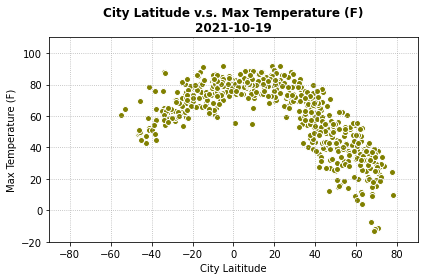

In [12]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_temp, marker = "o", color = "olive", edgecolor = "white")

plt.title(f"City Latitude v.s. Max Temperature (F)\n{date}", fontweight = "bold")
plt.xlabel("City Laititude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-90, 90)
plt.ylim(-20, 110)
plt.grid(linestyle = ":")

plt.tight_layout()

plt.savefig("image/Lat_vs_Temp")
plt.show()

#### This code is to see the realtionship between city latitude and temperature.  It appears the cities near the equator tend to be higher temperature.

## Latitude vs. Humidity Plot

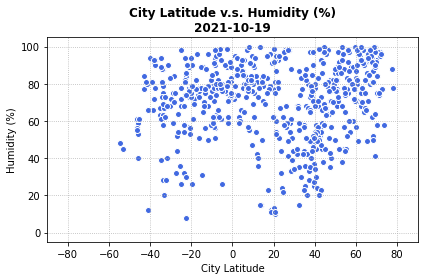

In [13]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_humid, marker = "o", color = "royalblue", edgecolor = "white")

plt.title(f"City Latitude v.s. Humidity (%)\n{date}", fontweight = "bold")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid(linestyle = ":")

plt.tight_layout()

plt.savefig("image/Lat_vs_Humid")
plt.show()

#### This code is to see the realtionship between city latitude and humidity.  It does not appear the two factors have much correlation.

## Latitude vs. Cloudiness Plot

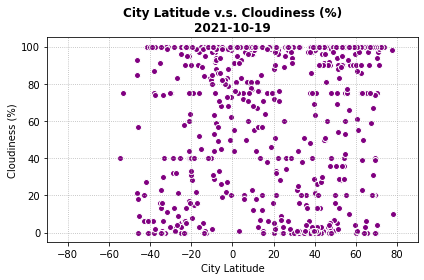

In [14]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_cloud, marker = "o", color = "purple", edgecolor = "white")

plt.title(f"City Latitude v.s. Cloudiness (%)\n{date}", fontweight = "bold")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid(linestyle = ":")

plt.tight_layout()

plt.savefig("image/Lat_vs_Cloud")
plt.show()

#### This code is to see the realtionship between city latitude and cloudiness.  It does not appear the two factors have much correlation.

## Latitude vs. Wind Speed Plot

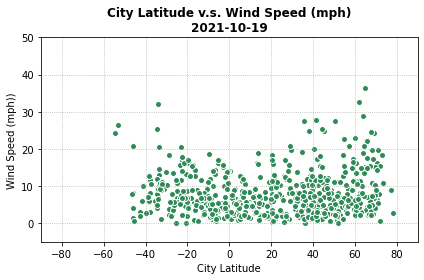

In [15]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_wind, marker = "o", color = "seagreen", edgecolor = "white")

plt.title(f"City Latitude v.s. Wind Speed (mph)\n{date}", fontweight = "bold")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph))")
plt.xlim(-90, 90)
plt.ylim(-5, 50)
plt.grid(linestyle = ":")

plt.tight_layout()

plt.savefig("image/Lat_vs_Wind")
plt.show()

#### This code is to see the realtionship between city latitude and wind speed.  It does not appear the two factor have much correlation. However, the cityies closer to the equator have less extreme wind speed.

## Linear Regression

In [16]:
n_hemisphere_df = clean_city_df.loc[clean_city_df["Latitude"] >= 0]
s_hemisphere_df = clean_city_df.loc[clean_city_df["Latitude"] < 0]
s_hemisphere_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
1,Punta Arenas,CL,-53.1500,-70.9167,64.51,45,75,26.46,2021-10-19
7,Atuona,PF,-9.8000,-139.0333,78.19,77,2,18.57,2021-10-19
12,Mar del Plata,AR,-38.0023,-57.5575,64.42,72,0,11.50,2021-10-19
16,Kavieng,PG,-2.5744,150.7967,83.03,75,83,9.95,2021-10-19
17,Vacaria,BR,-28.5122,-50.9339,56.84,75,2,5.73,2021-10-19


In [17]:
# set a function to create Linear Regression plots

def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue**2,2)

    plt.scatter(x, y, marker = "o", color = color, edgecolor = "white")
    plt.plot(x,regress_values,"r-")
    
    # add the linear regression equation and line
    plt.annotate(line_eq, position, fontsize = 15, color = "red", fontweight = "bold")
    plt.title(f"{title}\n{date}", fontweight = "bold")
    plt.xlabel("City Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
        
    plt.savefig(f"image/{figname}.png")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8466070963331496


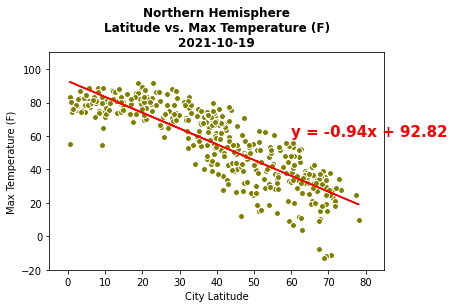

None


In [18]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Max Temperature (F)"]
y_label = "Max Temperature (F)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "olive"
position = (60, 60)

plt.xlim(-5, 85)
plt.ylim(-20, 110)
figname = "linreg_N_Temp"

print(linregress_plot(x,y))


#### The r value shows that in Northern Hemisphere, the city's latitude and the temperature has a strong negaitive relationship.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7095422560507807


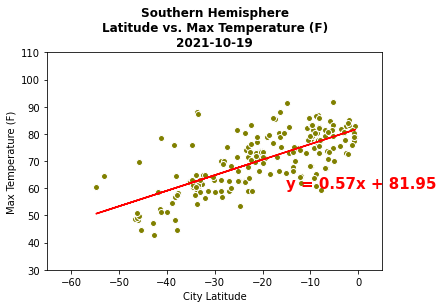

None


In [19]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Max Temperature (F)"]
y_label = "Max Temperature (F)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "olive"
position = (-15, 60)

plt.xlim(-65, 5)
plt.ylim(30, 110)
figname = "linreg_S_Temp"

print(linregress_plot(x,y))


#### The r value shows that in Southern Hemisphere, the city's latitude and the temperature has a strong positive relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1691526347883819


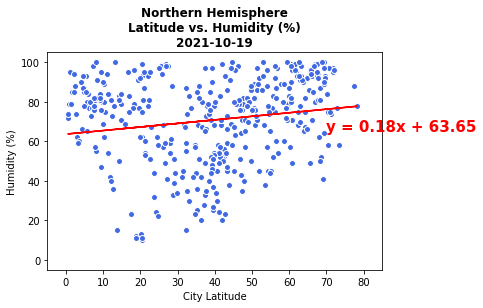

None


In [20]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Humidity (%)"]
y_label = "Humidity (%)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "royalblue"
position = (70, 65)

plt.xlim(-5, 85)
plt.ylim(-5, 105)
figname = "linreg_N_Humid"

print(linregress_plot(x,y))


#### The r value shows that in Northern Hemisphere, the city's latitude and the humidity have a weak positive relationship.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2489647648126615


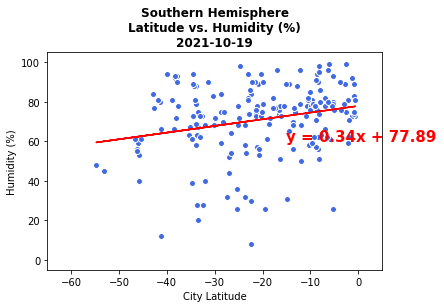

None


In [21]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Humidity (%)"]
y_label = "Humidity (%)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "royalblue"
position = (-15, 60)

plt.xlim(-65, 5)
plt.ylim(-5, 105)
figname = "linreg_S_Humid"

print(linregress_plot(x,y))


#### The r value shows that in Southern Hemisphere, the city's latitude and the humidity have a somehow weak positive relationship.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.047639440197995084


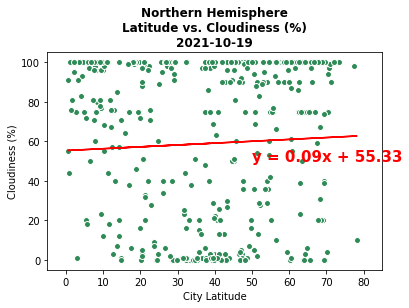

None


In [22]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Cloudiness (%)"]
y_label = "Cloudiness (%)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "seagreen"
position = (50, 50)

plt.xlim(-5, 85)
plt.ylim(-5, 105)
figname = "linreg_N_Cloud"

print(linregress_plot(x,y))


#### The r value shows that in Southern Hemisphere, the city's latitude and the cloudiness doesn't have relationship.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.35285335799235146


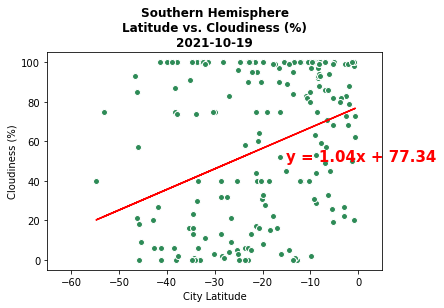

None


In [23]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Cloudiness (%)"]
y_label = "Cloudiness (%)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "seagreen"
position = (-15, 50)

plt.xlim(-65, 5)
plt.ylim(-5, 105)
figname = "linreg_S_Cloud"

print(linregress_plot(x,y))


#### The r value shows that in Southern Hemisphere, the city's latitude and the cloudiness have a somehow strong positive relationship.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.24388731807856773


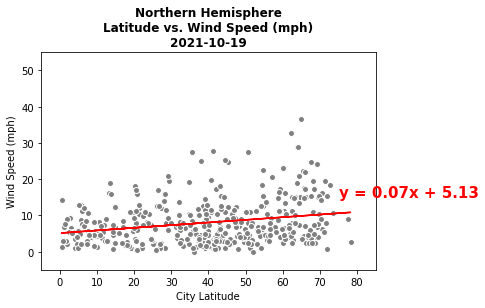

None


In [24]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Wind Speed (mph)"]
y_label = "Wind Speed (mph)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "gray"
position = (75, 15)

plt.xlim(-5, 85)
plt.ylim(-5, 55)
figname = "linreg_N_Wind"

print(linregress_plot(x,y))


#### The r value shows that in Northern Hemisphere, the city's latitude and the wind speed have a weak positive relationship.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.21325413102955237


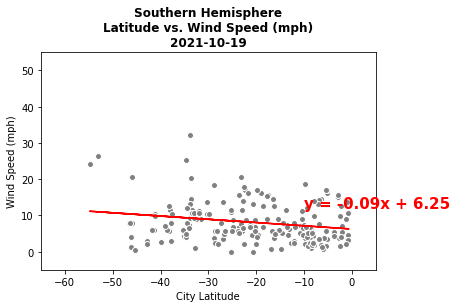

None


In [25]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Wind Speed (mph)"]
y_label = "Wind Speed (mph)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "gray"
position = (-10, 12)

plt.xlim(-65, 5)
plt.ylim(-5, 55)
figname = "linreg_S_Wind"

print(linregress_plot(x,y))


#### The r value shows that in Southern Hemisphere, the city's latitude and the wind speed have a weak negitive relationship.